In [22]:
env ROBOFLOW_API_KEY="K1RsKDud3xFEWD4hdbeu"


env: ROBOFLOW_API_KEY="K1RsKDud3xFEWD4hdbeu"


In [ ]:
python.exe -m pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install supervision


[notice] A new release of pip available: 22.3 -> 25.3


[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [5]:
# import a utility function for loading Roboflow models
from inference import get_model

# define the image url to use for inference
image = "https://media.roboflow.com/inference/people-walking.jpg"

# load a pre-trained yolov8n model
model = get_model(model_id="yolov8n-640")

# run inference on our chosen image, image can be a url, a numpy array, a PIL image, etc.
results = model.infer(image)

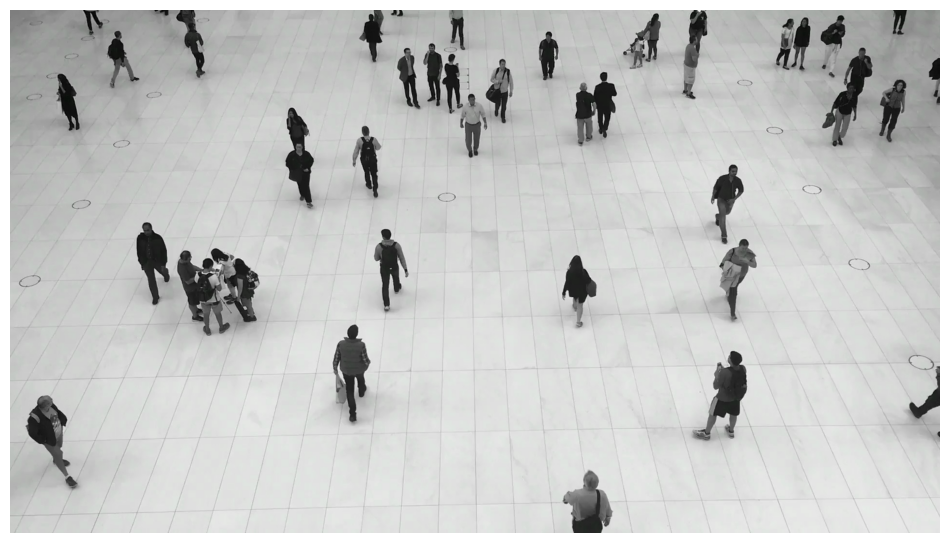

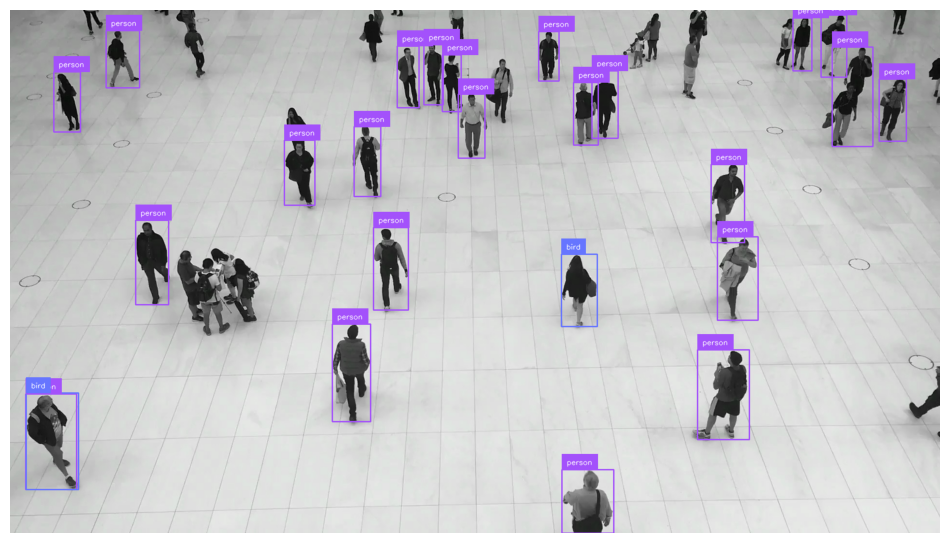

In [9]:
from io import BytesIO

import requests
import supervision as sv
from inference import get_model
from PIL import Image
from PIL.ImageFile import ImageFile


def load_image_from_url(url: str) -> ImageFile:
    response = requests.get(url)
    response.raise_for_status()  # check if the request was successful
    image = Image.open(BytesIO(response.content))
    return image


# load the image from an url
image = load_image_from_url("https://media.roboflow.com/inference/people-walking.jpg")
sv.plot_image(image)

# load a pre-trained yolov8n model
model = get_model(model_id="yolov8n-640")

# run inference on our chosen image, image can be a url, a numpy array, a PIL image, etc.
results = model.infer(image)[0]

# load the results into the supervision Detections api
detections = sv.Detections.from_inference(results)

# create supervision annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# display the image

sv.plot_image(annotated_image)

In [34]:
# automatically get the current working directory of the notebook
notebook_dir = os.getcwd()
notebook_dir

'C:\\Users\\oldys\\AppData\\Local\\Programs\\Microsoft VS Code'

In [35]:
from pathlib import Path
import subprocess, cv2

repo_root = Path(subprocess.check_output(["git","rev-parse","--show-toplevel"], text=True).strip())
image_file = repo_root / "code" / "taylor-swift-album-1989.jpeg"

bgr = cv2.imread(str(image_file))
if bgr is None:
    raise FileNotFoundError(image_file)


FileNotFoundError: [WinError 2] Не удается найти указанный файл

In [ ]:
import os
import cv2
from PIL import Image
import supervision as sv  # if you’re using it



# build the full path to your image
image_file = os.path.join(notebook_dir, "taylor-swift-album-1989.jpeg")

bgr = cv2.imread(image_file)
if bgr is None:
    raise FileNotFoundError(f"Image not found: {image_file}")

rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
image = Image.fromarray(rgb)
sv.plot_image(image)


FileNotFoundError: taylor-swift-album-1989.jpeg

In [ ]:
from inference import get_model
import supervision as sv
import cv2

# define the image file to use for inference
image_file = "taylor-swift-album-1989.jpeg"

# read with OpenCV (BGR) and convert to RGB PIL Image because this inference configuration
# does not accept NumPy arrays directly
bgr = cv2.imread(image_file)
if bgr is None:
    raise FileNotFoundError(f"Image not found: {image_file}")
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
# PIL.Image was already imported in another cell; use it to create a PIL image
image = __import__("PIL").Image.fromarray(rgb)

# load a pre-trained yolov8n model
model = get_model(model_id="taylor-swift-records/3", api_key="K1RsKDud3xFEWD4hdbeu")

# run inference on our chosen image (pass a PIL image, not a NumPy array)
results = model.infer(image)[0]

# load the results into the supervision Detections api
detections = sv.Detections.from_inference(results)

# create supervision annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

# display the image
sv.plot_image(annotated_image)

FileNotFoundError: Image not found: taylor-swift-album-1989.jpeg

In [2]:
import cv2, tempfile, time
from IPython.display import display, clear_output
from PIL import Image
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(api_url="http://localhost:9001", api_key="K1RsKDud3xFEWD4hdbeu")
MODEL_ID = "rock-paper-scissors-sxsw/14"

def draw(preds, frame):
    for p in preds.get("predictions", []):
        x, y, w, h = int(p["x"]), int(p["y"]), int(p["width"]), int(p["height"])
        x1, y1, x2, y2 = x - w//2, y - h//2, x + w//2, y + h//2
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(frame, f'{p["class"]} {p["confidence"]:.2f}', (x1, max(20, y1-8)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)
    return frame

cap = cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
if not cap.isOpened():
    raise RuntimeError("Camera not found")

try:
    while True:
        ok, frame = cap.read()
        if not ok:
            break
        preds = CLIENT.infer(frame, model_id=MODEL_ID)
        frame = draw(preds, frame)

        # convert BGR to RGB and show inline
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image.fromarray(rgb))
        time.sleep(0.02)  # ~50 FPS cap to avoid flicker
except KeyboardInterrupt:
    pass
finally:
    cap.release()


ModuleNotFoundError: No module named 'cv2'